# Module 12: Machine Learning with Python

Our goal will be to create a machine learning algorithm that can tell who lived and who died.

[The kaggle contest and dataset](https://www.kaggle.com/competitions/titanic/data)

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

If you want to see all rows when calling a dataframe use the code below:

In [ ]:
#pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [ ]:
test.head(1)

**Pclass:** A proxy for socio-economic status (SES)  
1st = Upper   
2nd = Middle  
3rd = Lower  

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

**SibSp:** The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**Parch:** The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Embarked** The city from which the passengers embarked.  
C = Cherbourg,   
Q = Queenstown,   
S = Southampton

In [ ]:
sns.set_style('ticks')
sns.set_context('talk')

In [ ]:
# To set size for all visualizations use the following:

sns.set(rc={'figure.figsize': (7,7)})

In [ ]:
# To set size for a single visualization use the following:
# plt.figure(figsize=(7,7))

sns.countplot(x='Survived', hue = 'Pclass', data=train)

In [ ]:
sns.histplot(train['Age'].dropna(), kde=False, bins=16)

In [ ]:
#train['Fare'].plot.hist(bins=40, figsize=(10,4)) 
sns.histplot(train['Fare'].dropna(), kde=False, bins= 50)

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train)

# lets make heat map

1. Create correlation matrix

In [ ]:
correlation_matrix = train.corr()
correlation_matrix

2. Create heatmap

In [ ]:
sns.heatmap(correlation_matrix, cmap = "Blues")

3. Do both in one line

<AxesSubplot:>

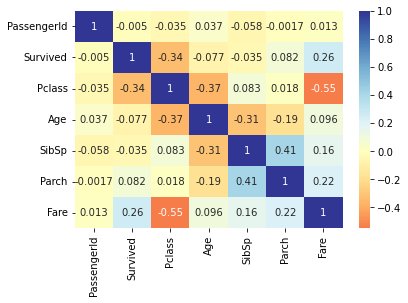

In [3]:
sns.heatmap(train.corr(), cmap ="RdYlBu", center = 0, annot = True) 
# notice the selection of the center at zero

- Consider how every column correlates with the **"Survived"** column.
- Contemplate both the positive and the negative correlations
- Drop insignificant features

#### Drop unwanted columns

In [4]:
train = train.drop(['Name','SibSp','Parch','Ticket', 'Cabin'], axis=1)
test = test.drop(['Name','SibSp','Parch','Ticket', 'Cabin'], axis=1)

#### Drop Nulls

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [6]:
train = train.dropna()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   Fare         712 non-null    float64
 6   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [9]:
test = test.dropna()

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Sex          331 non-null    object 
 3   Age          331 non-null    float64
 4   Fare         331 non-null    float64
 5   Embarked     331 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.1+ KB


#### Convert Sex to Numeric

In [11]:
genders = {"female": 0, "male": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [12]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,S
1,2,1,1,0,38.0,71.2833,C
2,3,1,3,0,26.0,7.9250,S
3,4,1,1,0,35.0,53.1000,S
4,5,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,29.1250,Q
886,887,0,2,1,27.0,13.0000,S
887,888,1,1,0,19.0,30.0000,S
889,890,1,1,1,26.0,30.0000,C


#### Convert Embaked into numeric

In [13]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,0
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,0
4,5,0,3,1,35.0,8.0500,0


In [15]:
test.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,2


# Building Machine Learning Models

The dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [16]:
X_train = train.drop(["Survived","PassengerId"], axis=1) #independent variable, features only
Y_train = train["Survived"] #dependent variable, target
X_test  = test.drop("PassengerId", axis=1)#.copy()

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    int64  
 2   Age       331 non-null    float64
 3   Fare      331 non-null    float64
 4   Embarked  331 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.5 KB


# Logistic Regression:

#### Creating the Model

In [19]:
#Alias Method and Select Number of Max Iterations

lr = LogisticRegression(max_iter=1000)

# Fit / Train the model on your training data
lr.fit(X_train, Y_train)

# Evaluate the model
lr.score(X_train, Y_train)
lr_score = round(lr.score(X_train, Y_train) * 100, 2)
lr_score

79.49

#### Using the Model

In [20]:
#Predict values in known column
lr.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [21]:
#Compare predicted values to known values

lrcm = confusion_matrix(lr.predict(X_train),Y_train)
lrcm

array([[359,  81],
       [ 65, 207]], dtype=int64)

In [22]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

#### Use the model in new contexts, Jack and Rose

In [24]:
# Create a dictionary containing the data you need, with correct number and order of columns

passengers = {'Pclass': [3, 1], 'Sex': [1, 0],'Age': [22, 17], 'Fare':[7,70], 'Embarked': [1,1]}

# Turn that dictionary into a dataframe
jackandrose = pd.DataFrame.from_dict(passengers)

# Call the dataframe
jackandrose

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,1
1,1,0,17,70,1


In [25]:
# Use the model on a dataframe

lr_survival_prediction = lr.predict(jackandrose)
print (lr_survival_prediction)

[0 1]


# Linear Support Vector Machine:

In [26]:
# Alias Method and Select Number of Max Iterations
lsvc = LinearSVC(max_iter=1000000)

# Fit / Train the model on your training data
lsvc.fit(X_train, Y_train)

# Evaluate the model
lsvc.score(X_train, Y_train)

C:\Users\Mel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7963483146067416

In [27]:
lsvc_score = round(lsvc.score(X_train, Y_train) * 100, 2)
lsvc_score

79.63

In [28]:
#Predict values in known column

lsvc.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [29]:
#Compare predicted values to known values

lscvcm = confusion_matrix(lsvc.predict(X_train),Y_train)
lscvcm

array([[364,  85],
       [ 60, 203]], dtype=int64)

In [30]:
lsvc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [31]:
lsvc_survival_prediction = lsvc.predict(jackandrose)
print (lsvc_survival_prediction)

[0 1]


# Decision Tree

In [32]:
# Alias Method 
dt = DecisionTreeClassifier() 

# Fit / Train the model on your training data
dt.fit(X_train, Y_train) 

# Evaluate the model
dt.score(X_train, Y_train)

0.9845505617977528

In [33]:
dt_score = round(dt.score(X_train, Y_train) * 100, 2)
dt_score

98.46

In [34]:
# Predict values in known column
dt.predict(X_test)  

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [35]:
# Compare predicted values to known values
dtcm = confusion_matrix(dt.predict(X_train),Y_train)
dtcm

array([[424,  11],
       [  0, 277]], dtype=int64)

In [36]:
survival_prediction = dt.predict(jackandrose)
print (survival_prediction)

[1 1]


# **Random Forest**

In [42]:
# Alias Method and Select Number of Max Iterations
rf = RandomForestClassifier(n_estimators=50)

# Fit / Train the model on your training data
rf.fit(X_train, Y_train)

# Evaluate the model
rf_score = rf.score(X_train, Y_train)
rf_score

0.9831460674157303

In [43]:
rf_score = round(rf.score(X_train, Y_train) * 100, 2)
rf_score

98.31

In [44]:
# Predict values in known column
rf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [45]:
# Compare predicted values to known values
rfcm = confusion_matrix(rf.predict(X_train),Y_train)
rfcm

array([[421,   9],
       [  3, 279]], dtype=int64)

In [46]:
survival_prediction = rf.predict(jackandrose)
print (survival_prediction)

[1 1]


# Comparing Models

In [47]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'Decision Tree','Random Forest'], 
              
    'Score': [lr_score, lsvc_score, dt_score, 
              rf_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
98.46,Decision Tree
98.31,Random Forest
79.63,Support Vector Machines
79.49,Logistic Regression


In [48]:
lrcm

array([[359,  81],
       [ 65, 207]], dtype=int64)

In [49]:
lscvcm

array([[364,  85],
       [ 60, 203]], dtype=int64)

In [50]:
dtcm

array([[424,  11],
       [  0, 277]], dtype=int64)

In [51]:
rfcm

array([[421,   9],
       [  3, 279]], dtype=int64)